# Assignment 3: Loan or No Loan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [2]:
df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [22]:
pycaret.__version__

'2.2.0'

In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.Loan_ID.nunique()

491

In [6]:
df.Dependents.unique()        

array(['0', '3+', '2', '1', nan], dtype=object)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.Loan_Status.value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [9]:
from pycaret.classification import *

In [10]:

reg = setup(data=df, target = 'Loan_Status',
            ignore_features=['Loan_ID'],
            train_size=0.80,
            remove_outliers=True,
            create_clusters=True,
            fix_imbalance=True,
            normalize=True,session_id=1975)

,Description,Value
0,session_id,1975
1,Target,Loan_Status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(491, 13)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
# cm=compare_models()

In [12]:
cm=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8158,0.7593,0.7357,0.8092,0.8061,0.5128,0.5244
1,0.7895,0.8249,0.7172,0.7810,0.7827,0.4591,0.4633
2,0.8378,0.8531,0.7797,0.8335,0.8327,0.5904,0.5960
3,0.7838,0.8829,0.7150,0.7754,0.7770,0.4539,0.4582
4,0.7297,0.6031,0.6503,0.7173,0.7212,0.3173,0.3203
5,0.8108,0.6311,0.6818,0.8509,0.7779,0.4454,0.5353
6,0.8649,0.8759,0.8252,0.8625,0.8629,0.6679,0.6693
7,0.8108,0.8374,0.7605,0.8067,0.8081,0.5350,0.5362
8,0.7297,0.7168,0.6503,0.7173,0.7212,0.3173,0.3203
9,0.7568,0.5402,0.6434,0.7422,0.7317,0.3300,0.3555


In [13]:
predict_model(cm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7374,0.7097,0.6590,0.7243,0.7222,0.3464,0.3579


,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Gender_not_available,Married_Yes,Dependents_0,Dependents_1,Dependents_2,...,Credit_History_not_available,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,data_cluster_0,data_cluster_1,data_cluster_2,Loan_Status,Label,Score
0,-0.604634,0.011041,-0.526057,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0.92
1,-0.314339,-0.073675,-1.057806,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0.76
2,-0.771855,0.446637,-0.407891,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0.91
3,0.549517,-0.508639,1.199170,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.95
4,-0.276318,-0.508639,-0.526057,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.489512,-0.508639,0.655605,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0.80
95,-0.456513,0.073630,-0.348808,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0.98
96,-0.598327,-0.508639,-1.081439,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.87
97,-0.531655,-0.049967,-0.502424,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.96


In [14]:
final=finalize_model(cm)

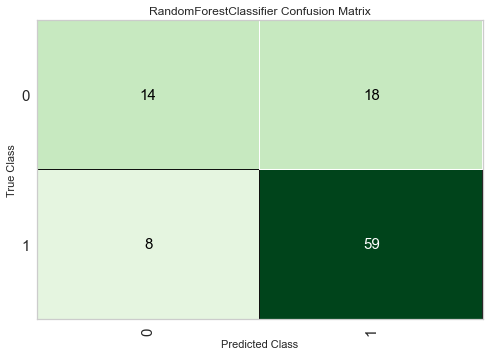

In [15]:
plot_model(cm, plot = 'confusion_matrix')

In [16]:
test= pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [17]:
d=predict_model(estimator=final,data=test)
d

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Label,Score
0,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,1,0.81
1,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,1,0.59
2,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,1,0.83
3,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural,1,0.72
4,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,0,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,0,0.53
119,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural,1,0.54
120,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban,1,0.89
121,Female,No,0,Not Graduate,Yes,17263,0.0,225.0,360.0,1.0,Semiurban,1,0.80


In [18]:
submission=d[['Label']]
submission.rename(columns={'Label':'prediction'},inplace=True)

In [19]:
submission

,prediction
0,1
1,1
2,1
3,1
4,0
...,...
118,0
119,1
120,1
121,1


In [20]:
submission.to_csv('loan_sub.csv',index=False)

In [32]:
save_model(final,'deployment_loan_prediction')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Loan_ID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Loan_Status', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         